In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook")

In [3]:
def mean(x: np.array) -> float:
    return sum(x)/len(x)

In [6]:
daten = [5.2, 4.8, 4.8, 6.1, 5.5]
mean(daten)

5.279999999999999

In [7]:
mean(daten + [100])

21.066666666666666

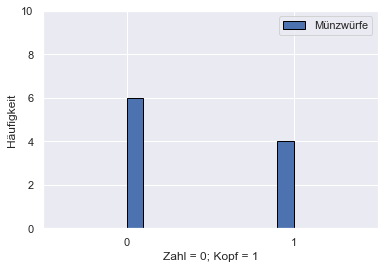

In [8]:
from scipy.stats import bernoulli

p = 0.3
n_samples = 10

bernoulli_sample = bernoulli.rvs(size = n_samples, p = p)

plt.hist(bernoulli_sample, edgecolor = "black")
plt.xlabel("Zahl = 0; Kopf = 1")
plt.ylabel("Häufigkeit")
plt.xlim(-0.5, 1.5);
plt.ylim(0, n_samples)
plt.xticks([0, 1], [0, 1]);
plt.legend(["Münzwürfe"]);

In [54]:
n_samples = 10

means_samples = [mean(bernoulli.rvs(size = n_samples, p = p)) for i in range(10)]
print(means_samples)
print(max(means_samples)-min(means_samples))

[0.4, 0.1, 0.2, 0.1, 0.5, 0.3, 0.2, 0.2, 0.7, 0.4]
0.6


In [57]:
n_samples = 10000

means_samples = [mean(bernoulli.rvs(size = n_samples, p = p)) for i in range(10)]
print(means_samples)
print(max(means_samples)-min(means_samples))

[0.2983, 0.3007, 0.2978, 0.3074, 0.2946, 0.3041, 0.3004, 0.3035, 0.3064, 0.2944]
0.013000000000000012


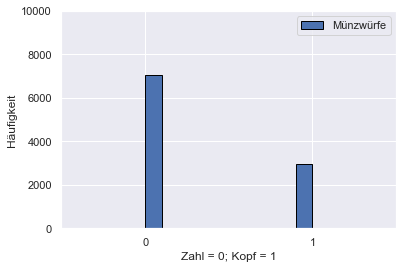

In [64]:
p = 0.3
n_samples = 10000

bernoulli_sample = bernoulli.rvs(size = n_samples, p = p)

plt.hist(bernoulli_sample, edgecolor = "black")
plt.xlabel("Zahl = 0; Kopf = 1")
plt.ylabel("Häufigkeit")
plt.xlim(-0.5, 1.5);
plt.ylim(0, n_samples);
plt.xticks([0, 1], [0, 1]);
plt.legend(["Münzwürfe"]);

In [65]:
mu = 0
sigma = 1
n_samples = 10

normal_sample = np.random.normal(mu, sigma, n_samples)
normal_sample

array([ 0.01675935,  0.16899508, -0.22583083, -1.61216439,  0.53900368,
       -2.47825143,  0.10065701,  0.74748927, -0.71822129,  0.69947379])

In [66]:
n_samples = 10

means_samples = [mean(np.random.normal(mu, sigma, n_samples)) for i in range(10)]
print(means_samples)
print(max(means_samples)-min(means_samples))

[0.004965365650492537, -0.3097914029400551, -0.15242630364744633, 0.1306005020379645, 0.3823519411837923, 0.03834296205530889, -0.005218700722037594, 0.4001318784106568, -0.15619049863102213, 0.4477766152735342]
0.7575680182135893


In [67]:
n_samples = 10000

means_samples = [mean(np.random.normal(mu, sigma, n_samples)) for i in range(10)]
print(means_samples)
print(max(means_samples)-min(means_samples))

[-0.0010244631108439163, 0.02467656221643869, 0.01596045677033776, -0.007175615501497269, 0.0002398519890519634, 0.014656393624409184, 0.012903764738542708, 0.002247037523095188, 0.010703448202294075, 0.008262869446850356]
0.031852177717935956


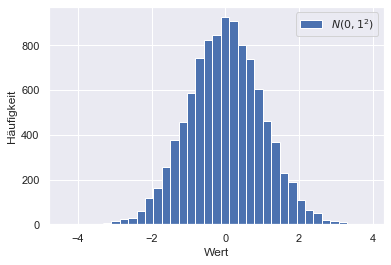

In [68]:
mu = 0
sigma = 1
n_samples = 10000

normal_sample = np.random.normal(mu, sigma, n_samples)

plt.hist(normal_sample, bins = int(1 + 3.3*np.log(len(normal_sample))))
plt.xlabel("Wert")
plt.xlim(min(normal_sample) - 1, max(normal_sample) + 1)
plt.ylabel("Häufigkeit")
plt.legend([f"$N({mu},{sigma}^2)$"]);

In [91]:
def median(x: np.array) -> float:
    x.sort()
    n_elements = len(x)
    is_even = len(x) % 2 == 0
    half_idx = int(len(x) / 2)
    if is_even:
        return (x[half_idx - 1] + x[half_idx])/2
    else:
        return x[half_idx]

In [101]:
daten = [3.1, 1.4, 2.8, 4.1, 6.3]

print(np.median(daten))
print(median(daten))

3.1
3.1


In [100]:
daten = [3.1, 1.4, 2.8, 4.1]

print(np.median(daten))
print(median(daten))

2.95
2.95


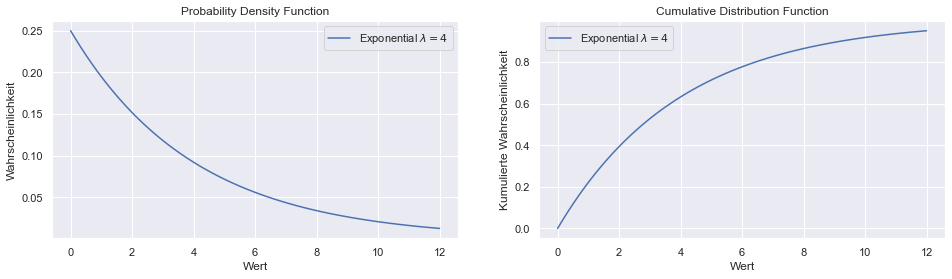

In [105]:
from scipy.stats import expon

rate = 4

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
x = np.linspace(0, rate*3, 100)
y_pdf = expon.pdf(x, scale = rate)
plt.plot(x, y_pdf, label = f"Exponential $\lambda={rate}$")
plt.ylabel("Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Probability Density Function")
plt.legend();

plt.subplot(1, 2, 2)
y_cdf = expon.cdf(x, scale = rate)
plt.plot(x, y_cdf, label = f"Exponential $\lambda={rate}$")
plt.ylabel("Kumulierte Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Cumulative Distribution Function")
plt.legend();

In [108]:
sample =  np.random.exponential(4, 10000)
loc, rate = expon.fit(sample)
print(f"lambda = {rate}")

x = np.linspace(min(sample) - 1, max(sample) + 1, 100)
pdf = expon.pdf(x, loc = loc, scale = rate)
cdf = expon.cdf(x, loc = loc, scale = rate)

cdf_ = np.linspace(start = 0, stop = 1, num = 100)
x_ = expon.ppf(cdf_, loc = loc, scale = rate)

lambda = 3.9991826580140075


2.77284165577063


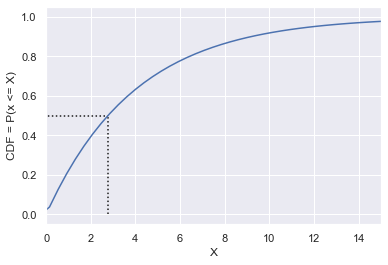

In [111]:
x_50 = expon.ppf(0.50, loc = loc, scale = rate)
print(x_50)

plt.plot(x, cdf)
plt.hlines(.50, min(sample)-1, x_50, linestyle = ":")
plt.vlines(x_50, 0, .50, linestyle = ":")
plt.xlim(0, 15)
plt.xlabel("X")
plt.ylabel("CDF = P(x <= X)");

In [112]:
median(sample)

2.794456329823923

In [162]:
def mode(x):
    counts = {}
    for element in x:
        if element not in counts:
            counts[element] = 1
        else:
            counts[element] += 1
    max_count = max(counts.values())
    modes = [key for key, value in counts.items() if value == max_count]
    
    return modes

In [165]:
daten = [3, 1, 2, 3]

mode(daten)

[3]

In [166]:
daten = [3, 1, 2, 3, 2]

mode(daten)

[3, 2]